<a href="https://colab.research.google.com/github/ankitbatra22/Gesture-Recognizer/blob/develop/gesture_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ankitbatra22/Gesture-Recognizer.git
%cd Gesture-Recognizer/
!git checkout develop

Cloning into 'Gesture-Recognizer'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 115 (delta 47), reused 79 (delta 24), pack-reused 0
Receiving objects: 100% (115/115), 79.56 MiB | 34.19 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/Gesture-Recognizer
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'


In [3]:
!pwd
%cd Gesture-Recognizer/

/content
/content/Gesture-Recognizer


In [4]:
import torch
import torch.nn as nn
from preprocessing import VideoFolder
import json
from torchvision.transforms import *
import cv2
from PIL import Image as im
from matplotlib import pyplot as plt
import torch.optim as optim
import os
import tqdm
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%capture
!unzip '/content/drive/MyDrive/20bn-jester-v1.zip'

In [6]:
import json
import os

with open("./configs/config.json") as dataFile:
  config = json.load(dataFile)

save_dir = os.path.join(config["output_dir"], config["model_name"])

transform = Compose([
        CenterCrop(100),
        #Resize(size=(300,300)),
        ToTensor()
        #Normalize(mean=[0.485, 0.456, 0.406],
                  #std=[0.229, 0.224, 0.225])
    ])

In [7]:
train_data = VideoFolder(root=config['train_data_folder'],
                             csv_file_input=config['train_data_csv'],
                             csv_file_labels=config['labels_csv'],
                             clip_size=config['clip_size'],
                             nclips=1,
                             step_size=config['step_size'],
                             is_val=False,
                             transform=transform,
                             )

train_loader = torch.utils.data.DataLoader(
        train_data,
        batch_size=config['batch_size'], shuffle=True,
        num_workers=config['num_workers'], pin_memory=True,
        drop_last=True)
  
val_data = VideoFolder(root=config['val_data_folder'],
                          csv_file_input=config['val_data_csv'],
                          csv_file_labels=config['labels_csv'],
                          clip_size=config['clip_size'],
                          nclips=1,
                          step_size=config['step_size'],
                          is_val=True,
                          transform=transform,
                          )

val_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=config['batch_size'], shuffle=False,
    num_workers=config['num_workers'], pin_memory=True,
    drop_last=False)

In [8]:
from model import Net

device = (torch.device('cuda') if torch.cuda.is_available()
else torch.device('cpu'))
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

net = Net()
print(net)
optimizer = torch.optim.Adam(net.parameters(), config['lr'],
                                #momentum=config['momentum'],
                                weight_decay=config['weight_decay'])

criterion = nn.CrossEntropyLoss(reduction='sum')
EPOCHS = 20

Tesla P100-PCIE-16GB
True
Net(
  (conv1): Sequential(
    (0): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=Fals

175
tensor(8)


IndexError: ignored

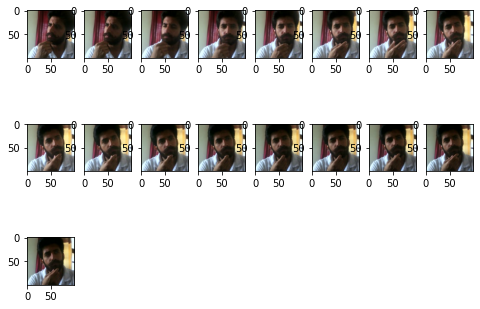

In [9]:
print(len(val_loader))
x = next(iter(val_loader))
#print(x)
#print(x[0].shape)

NUM = 24

print(x[1][NUM])
vidBatch = (x[0][NUM])
pog = vidBatch.permute(1,2,3,0)
pog[0]

import numpy as np
import matplotlib.pyplot as plt

w = 12
h = 12
fig = plt.figure(figsize=(8, 8))
columns = 8
rows = 4

for i in range(1, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    img = pog[i].detach().numpy()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

plt.show()



  0%|          | 0/1361 [00:00<?, ?it/s]

EPOCH:  0


  0%|          | 0/1361 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  1.3743356832417384 VALIDATION LOSS: 0.8326852062770299
VALIDATION ACCURACY 0.7010714285714286
EPOCH:  1


  0%|          | 0/1361 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  0.6947455597517247 VALIDATION LOSS: 0.5804797915049962
VALIDATION ACCURACY 0.8164285714285714
EPOCH:  2


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.558642565596419 VALIDATION LOSS: 0.5891191587277821
VALIDATION ACCURACY 0.8148214285714286
EPOCH:  3


  0%|          | 0/1361 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  0.43842805640102744 VALIDATION LOSS: 0.43781086334160396
VALIDATION ACCURACY 0.87125
EPOCH:  4


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.3487173099287024 VALIDATION LOSS: 0.4523049355724028
VALIDATION ACCURACY 0.8633928571428572
EPOCH:  5


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.28841396175327655 VALIDATION LOSS: 0.4576524326843875
VALIDATION ACCURACY 0.8785714285714286
EPOCH:  6


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.2573393413750489 VALIDATION LOSS: 0.5185216572242124
VALIDATION ACCURACY 0.8683928571428572
EPOCH:  7


  0%|          | 0/1361 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  0.28260965781350683 VALIDATION LOSS: 0.43326660918337956
VALIDATION ACCURACY 0.885
EPOCH:  8


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.18353298953823297 VALIDATION LOSS: 0.5262630195277078
VALIDATION ACCURACY 0.8796428571428572
EPOCH:  9


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.18861413556787485 VALIDATION LOSS: 0.49057465478777884
VALIDATION ACCURACY 0.8853571428571428
EPOCH:  10


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.1513914864321775 VALIDATION LOSS: 0.44156424010970763
VALIDATION ACCURACY 0.8910714285714286
EPOCH:  11


  0%|          | 0/1361 [00:00<?, ?it/s]

Epoch    12: reducing learning rate of group 0 to 1.0000e-04.

TRAIN LOSS:  0.20862688462271833 VALIDATION LOSS: 0.7981400757176536
VALIDATION ACCURACY 0.7892857142857143
EPOCH:  12


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.2960330019325215 VALIDATION LOSS: 0.48474798072661673
VALIDATION ACCURACY 0.8760714285714286
EPOCH:  13


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.14544054842613907 VALIDATION LOSS: 0.46557183202888286
VALIDATION ACCURACY 0.8914285714285715
EPOCH:  14


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.08807112340458506 VALIDATION LOSS: 0.4772476228193513
VALIDATION ACCURACY 0.9003571428571429
EPOCH:  15


  0%|          | 0/1361 [00:00<?, ?it/s]

Epoch    16: reducing learning rate of group 0 to 1.0000e-05.

TRAIN LOSS:  0.05646086391450736 VALIDATION LOSS: 0.5191511570263122
VALIDATION ACCURACY 0.9025
EPOCH:  16


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.03887246320158682 VALIDATION LOSS: 0.525935700102044
VALIDATION ACCURACY 0.9016071428571428
EPOCH:  17


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.036422005623020816 VALIDATION LOSS: 0.5301782097374754
VALIDATION ACCURACY 0.9021428571428571
EPOCH:  18


  0%|          | 0/1361 [00:00<?, ?it/s]


TRAIN LOSS:  0.034507723747540305 VALIDATION LOSS: 0.542540173603754
VALIDATION ACCURACY 0.9041071428571429
EPOCH:  19


100%|██████████| 1361/1361 [14:18<00:00,  1.59it/s]


Epoch    20: reducing learning rate of group 0 to 1.0000e-06.

TRAIN LOSS:  0.032265447727775766 VALIDATION LOSS: 0.5460236954050405
VALIDATION ACCURACY 0.9023214285714286


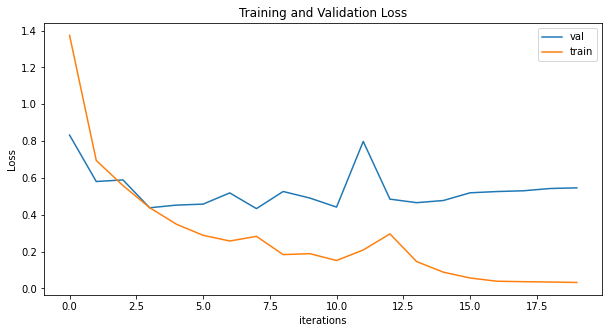

In [10]:
import matplotlib.pyplot as plt
from tqdm import tqdm

net.cuda()
torch.cuda.empty_cache()

val_losses = []
train_losses = []
min_valid_loss = 1e99


scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)

for epoch in range(EPOCHS):
    correct, total = 0, 0
    train_loss = 0.0
    net.train()

    print("EPOCH: ", epoch)
    for i, (input, target) in enumerate(tqdm(train_loader)):
      #print(i)
      input, target = input.to(device = device), target.to(device = device)
      optimizer.zero_grad()
      output = net(input)
      loss = criterion(output, target)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()

    net.eval()
    validation_loss = 0.0


    with torch.no_grad():
      for i, (item, truth) in enumerate(val_loader):
        item, truth = item.to(device = device), truth.to(device = device)
        out = net(item)
        #print(torch.argmax(out, dim=1), truth)
        # [predictions] and [truth]
        matching = torch.eq(torch.argmax(out, dim=1), truth)
        #print(torch.sum(matching, dim=0).item())
        # [boolean array]
        correct += torch.sum(matching, dim=0).item()
        total += 32
        valLoss = criterion(out, truth)
        validation_loss += valLoss.item()   

    # test accuracy calculation
    assert total == (len(val_loader) * config["batch_size"])
    #print(correct, total)
    accuracy = correct / total
    validation_loss /= (len(val_loader) * config["batch_size"]) #len val loader is the number of val batches
    train_loss /= (len(train_loader) * config["batch_size"])
    
    scheduler.step(validation_loss)

    if validation_loss < min_valid_loss:
      min_valid_loss = validation_loss
      torch.save(net.state_dict(), '/content/drive/MyDrive/aug4.pt')
      print()
      print("model saved!")
      
    train_losses.append(train_loss)
    val_losses.append(validation_loss)

    print()
    print("TRAIN LOSS: ", train_loss, "VALIDATION LOSS:", validation_loss, )
    print("VALIDATION ACCURACY", accuracy)



plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [11]:
torch.save(net.state_dict(), '/content/drive/MyDrive/latest.pt')